In [8]:
# Commitments of Traders (COT) report is a weekly publication released by the US Commodity Futures Trading Commission (CFTC). It provides information on thepositions held by various market participants in futures markets. The report is based on data collected from futures exchanges, including the Chicago Mercantile Exchange (CME) and the Intercontinental Exchange (ICE)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from master_function import import_cot_data
import cot_reports as crp

In [5]:
def import_cot_data(start_year, end_year, market):
    df = pd.DataFrame()
    for i in range(start_year, end_year + 1):
        single_year = pd.DataFrame(cot.cot_year(i, cot_report_type='traders_in_financial_futures_fut'))
        df = pd.concat([single_year, df], ignore_index=True)
    new_df = df.loc[:, ['Market_and_Exchange_Names',
                        'Report_Date_as_YYYY-MM-DD',
                        'Pct_of_OI_Dealer_Long_All',
                        'Pct_of_OI_Dealer_Short_All',
                        'Pct_of_OI_Lev_Money_Long_All',
                        'Pct_of_OI_Lev_Money_Short_All']]
    new_df['Report_Date_as_YYYY-MM-DD'] = pd.to_datetime(new_df['Report_Date_as_YYYY-MM-DD'])
    new_df = new_df.sort_values(by='Report_Date_as_YYYY-MM-DD')
    data = new_df[new_df['Market_and_Exchange_Names'] == market]
    data['Net_COT'] = (data['Pct_of_OI_Lev_Money_Long_All'] - \
                       data['Pct_of_OI_Lev_Money_Short_All']) - \
                      (data['Pct_of_OI_Dealer_Long_All'] -\
                       data['Pct_of_OI_Dealer_Short_All']) 
    return data

In [9]:
CAD = 'CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE'
data = import_cot_data(2015, 2023, CAD)
data = np.array(data.iloc[:, -1], dtype = np.float64)

Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2015
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2016
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2017
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2018
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2019
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2020
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2021
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fu

C:\Windows\System32\master_function.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Net_COT'] = (data['Pct_of_OI_Lev_Money_Long_All'] - \


In [11]:
#transformation? adf test
from statsmodels.tsa.stattools import adfuller
print('p-value: %f' % adfuller(data)[1])
#COT values стационарны и могут быть использованы как дальнейший input

p-value: 0.000807


In [13]:
#1_Indirect One-Step COT Model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from master_function import import_cot_data, data_preprocessing
from master_function import plot_train_test_values
from master_function import calculate_directional_accuracy
from sklearn.metrics import mean_squared_error

In [15]:
CAD = 'CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE'
data = import_cot_data(2015, 2023, CAD)
data = np.array(data.iloc[:, -1], dtype = np.float64)

Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2015
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2016
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2017
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2018
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2019
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2020
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2021
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fu

C:\Windows\System32\master_function.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Net_COT'] = (data['Pct_of_OI_Lev_Money_Long_All'] - \


In [16]:
#гиперпараметры
num_lags = 100
train_test_split = 0.80
num_neurons_in_hidden_layers = 200
num_epochs = 200
batch_size = 4

In [17]:
#train test split
x_train, y_train, x_test, y_test = data_preprocessing(data, num_lags, train_test_split)

In [24]:
#lstm архитектура
import keras
model = Sequential()
model.add((LSTM(units =num_neurons_in_hidden_layers, input_shape = (num_lags, 1))))
model.add(Dense(num_neurons_in_hidden_layers, activation = 'relu'))
# Adding the output layer
model.add(Dense(units = 1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [25]:
#обучение модели
model.fit(x_train, y_train, epochs = num_epochs, batch_size = batch_size)

Epoch 1/200
74/74 [==============================] - 6s 54ms/step - loss: 760.1967
Epoch 2/200
74/74 [==============================] - 4s 52ms/step - loss: 166.8357
Epoch 3/200
74/74 [==============================] - 4s 51ms/step - loss: 154.9729
Epoch 4/200
74/74 [==============================] - 4s 52ms/step - loss: 157.7699
Epoch 5/200
74/74 [==============================] - 4s 52ms/step - loss: 146.0957
Epoch 6/200
74/74 [==============================] - 4s 49ms/step - loss: 137.7968
Epoch 7/200
74/74 [==============================] - 4s 54ms/step - loss: 143.8289
Epoch 8/200
74/74 [==============================] - 4s 48ms/step - loss: 140.8385
Epoch 9/200
74/74 [==============================] - 4s 50ms/step - loss: 124.4690
Epoch 10/200
74/74 [==============================] - 4s 49ms/step - loss: 130.7803
Epoch 11/200
74/74 [==============================] - 4s 56ms/step - loss: 121.3080
Epoch 12/200
74/74 [==============================] - 4s 60ms/step - loss: 123.2078
E

74/74 [==============================] - 5s 64ms/step - loss: 39.8987
Epoch 100/200
74/74 [==============================] - 5s 63ms/step - loss: 36.9078
Epoch 101/200
74/74 [==============================] - 4s 59ms/step - loss: 36.9600
Epoch 102/200
74/74 [==============================] - 4s 60ms/step - loss: 57.4463
Epoch 103/200
74/74 [==============================] - 5s 61ms/step - loss: 49.3160
Epoch 104/200
74/74 [==============================] - 5s 64ms/step - loss: 41.5258
Epoch 105/200
74/74 [==============================] - 4s 59ms/step - loss: 42.0084
Epoch 106/200
74/74 [==============================] - 5s 70ms/step - loss: 39.0343
Epoch 107/200
74/74 [==============================] - 5s 63ms/step - loss: 33.4101
Epoch 108/200
74/74 [==============================] - 5s 66ms/step - loss: 38.8121
Epoch 109/200
74/74 [==============================] - 5s 68ms/step - loss: 36.1421
Epoch 110/200
74/74 [==============================] - 6s 78ms/step - loss: 47.9242
Epoch 

Epoch 197/200
74/74 [==============================] - 5s 61ms/step - loss: 5.7119
Epoch 198/200
74/74 [==============================] - 4s 59ms/step - loss: 5.2129
Epoch 199/200
74/74 [==============================] - 4s 59ms/step - loss: 5.1245
Epoch 200/200
74/74 [==============================] - 6s 78ms/step - loss: 4.9489


In [26]:
# Predicting in the training set for illustrative purposes
y_predicted_train = model.predict(x_train)
# Predicting in the test set
y_predicted = model.predict(x_test)

3/3 [==============================] - 0s 40ms/step


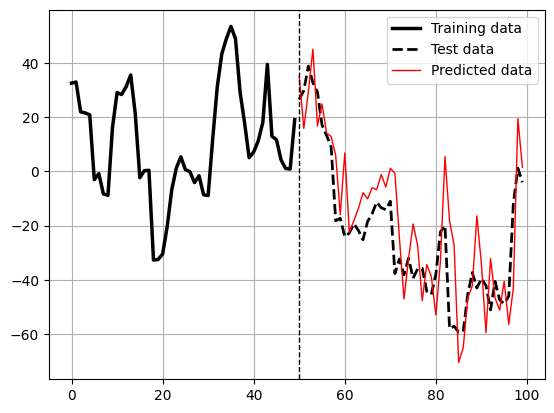

In [27]:
plot_train_test_values(100, 50, y_train, y_test, y_predicted)